In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("ipl.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [6]:
to_delete_columns= ['mid','batsman','bowler','striker','non-striker']
df.drop(labels=to_delete_columns, axis=1, inplace=True)

In [7]:
common_teams = ['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals','Mumbai Indians', 'Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']
df = df[(df['bat_team'].isin(common_teams)) & (df['bowl_team'].isin(common_teams))]

df = df[df['overs']>=5.0]

df['date']=df['date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

In [8]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [9]:
common_venues = ['M Chinnaswamy Stadium','Punjab Cricket Association Stadium, Mohali','Feroz Shah Kotla','Wankhede Stadium','MA Chidambaram Stadium, Chepauk','Eden Gardens','Sawai Mansingh Stadium','Himachal Pradesh Cricket Association Stadium','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium','Sharjah Cricket Stadium','Dubai International Cricket Stadium','Sheikh Zayed Stadium']
df = df[df['venue'].isin(common_venues)]

In [10]:
df['venue'].value_counts()

Eden Gardens                                           4497
M Chinnaswamy Stadium                                  4406
Feroz Shah Kotla                                       4265
Wankhede Stadium                                       4259
MA Chidambaram Stadium, Chepauk                        3734
Punjab Cricket Association Stadium, Mohali             2710
Sawai Mansingh Stadium                                 2516
Dubai International Cricket Stadium                     649
Himachal Pradesh Cricket Association Stadium            646
Sheikh Zayed Stadium                                    611
Sharjah Cricket Stadium                                 559
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     462
Name: venue, dtype: int64

In [11]:
encoded_df = pd.get_dummies(data=df,columns=['bat_team','bowl_team','venue'])

In [12]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali",venue_Sawai Mansingh Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_Wankhede Stadium
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,1,0,0,0,0,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,1,0,0,0,0,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,1,0,0,0,0,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,1,0,0,0,0,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [13]:
encoded_df.reset_index(inplace=True)
encoded_df.drop(['index'],inplace=True,axis=1)
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali",venue_Sawai Mansingh Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_Wankhede Stadium
0,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(encoded_df[['runs','wickets','overs','runs_last_5','wickets_last_5']])
scaled_cols = pd.DataFrame(scaled_cols,columns=['runs','wickets','overs','runs_last_5','wickets_last_5'])

In [15]:
encoded_df.drop(['runs','wickets','overs','runs_last_5','wickets_last_5'],inplace=True,axis=1)
encoded_df = pd.concat([encoded_df,scaled_cols],axis=1)
encoded_df.head()

,date,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,...,"venue_Punjab Cricket Association Stadium, Mohali",venue_Sawai Mansingh Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_Wankhede Stadium,runs,wickets,overs,runs_last_5,wickets_last_5
0,2008-04-18,222,0,0,0,1,0,0,0,0,...,0,0,0,0,0,-0.844267,-1.578929,-1.666121,1.707573,-1.219172
1,2008-04-18,222,0,0,0,1,0,0,0,0,...,0,0,0,0,0,-0.844267,-1.054771,-1.642993,1.707573,-0.285605
2,2008-04-18,222,0,0,0,1,0,0,0,0,...,0,0,0,0,0,-0.844267,-1.054771,-1.619864,1.707573,-0.285605
3,2008-04-18,222,0,0,0,1,0,0,0,0,...,0,0,0,0,0,-0.844267,-1.054771,-1.596736,1.707573,-0.285605
4,2008-04-18,222,0,0,0,1,0,0,0,0,...,0,0,0,0,0,-0.844267,-1.054771,-1.573608,1.620866,-0.285605


In [16]:
encoded_df.columns

Index(['date', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Sawai Mansingh Stadium

In [17]:
X_train = encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year<=2016]
X_test = encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year>2016]
y_train = encoded_df[encoded_df['date'].dt.year<=2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year>2016]['total'].values

In [18]:
X_train.drop(labels='date',axis=1,inplace=True)
X_test.drop(labels='date',axis=1,inplace=True)

MAE: 11.598322350726196
MSE: 221.49958605096828
RMSE: 14.88286215924102
R2_Score: 0.6861646329572273


<AxesSubplot:ylabel='Density'>

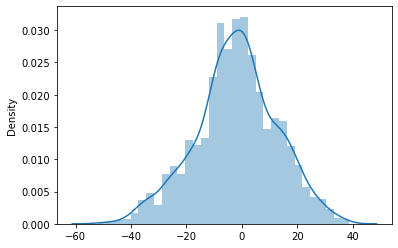

In [19]:
# Model:linear regression
regressor =  LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2_Score:',metrics.r2_score(y_test,y_pred))
sns.distplot(y_test-y_pred)

In [20]:
# Model: Ridge regression
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,30,40,60,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-08}
-355.3091601340053


MAE: 11.63373564791407
MSE: 224.7057870152398
RMSE: 14.990189692436843
R2_Score: 0.6816218738741313


<AxesSubplot:ylabel='Density'>

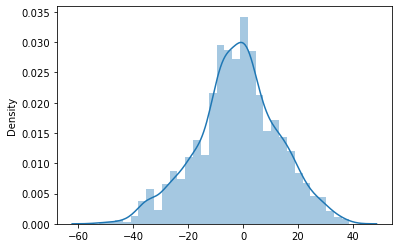

In [21]:
y_pred_ridge = ridge_regressor.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge)))
print('R2_Score:',metrics.r2_score(y_test,y_pred_ridge))
sns.distplot(y_test-y_pred_ridge)

In [22]:
# Model : Lasso Regression
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-355.29998814202855


MAE: 11.62857707476111
MSE: 224.34766641859937
RMSE: 14.978239763690505
R2_Score: 0.6821292829889563


<AxesSubplot:ylabel='Density'>

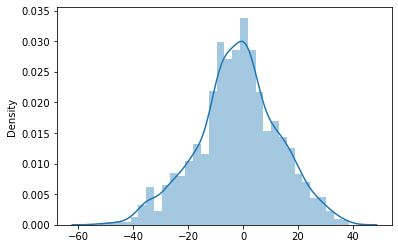

In [23]:
y_pred_lasso = lasso_regressor.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_lasso)))
print('R2_Score:',metrics.r2_score(y_test,y_pred_lasso))
sns.distplot(y_test-y_pred_lasso)

In [24]:
# filename1 = 'Batting-score-Reg-model.pkl'
# filename2 = 'Batting-score-RidgeReg-model.pkl'
# filename3 = 'Batting-score-LassoReg-model.pkl'
# pickle.dump(regressor, open(filename1, 'wb'))
# pickle.dump(ridge_regressor, open(filename2, 'wb'))
# pickle.dump(lasso_regressor, open(filename3, 'wb'))

In [26]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(200,600,num=10)]
max_features = ['auto','sqrt','log2']
max_depth = [None,10,20,30,40,50,60]
min_samples_split = [2,5,10,20]
min_samples_leaf = [1,2,4,8]
bootstrap = [True,False]

params = {'n_estimators':n_estimators,
         'max_features':max_features,
         'max_depth':max_depth,
         'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf,
         'bootstrap':bootstrap}

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rf_regressor = RandomizedSearchCV(rfr,params,scoring='neg_mean_squared_error',cv=5)
rf_regressor.fit(X_train,y_train)
print(rf_regressor.best_params_)

{'n_estimators': 511, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}


MAE: 14.446352214347424
MSE: 355.1857569399577
RMSE: 18.846372514092934
R2_Score: 0.49674916154485804


<AxesSubplot:ylabel='Density'>

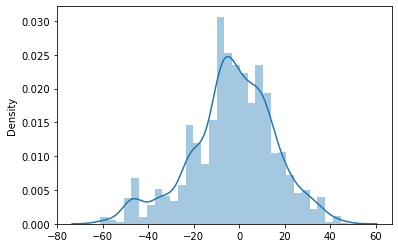

In [29]:
y_pred_rf = rf_regressor.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))
print('R2_Score:',metrics.r2_score(y_test,y_pred_rf))
sns.distplot(y_test-y_pred_rf)